In [1]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

pcepi_data = pf.get_series(series_id="PCEPI", api_key=api_key)
pcepi_data_not_adj = pf.get_series(series_id="PCEPI", api_key=api_key)

# Convert 'Date' column to datetime format
pcepi_data['date'] = pd.to_datetime(pcepi_data['date'])
# Sort DataFrame by 'Date' in ascending order
pcepi_data.sort_values('date', inplace=True)
# Calculate month-over-month percentage change
pcepi_data['MoM_Percentage_Change'] = pcepi_data['value'].pct_change() * 100
# Calculate year-over-year percentage change
pcepi_data_not_adj['YoY_Percentage_Change'] = pcepi_data_not_adj['value'].pct_change(12) * 100

# Merge YoY_Percentage_Change column from df2 to df1 based on 'Date'
pcepi_data = pd.merge(pcepi_data, pcepi_data_not_adj[['date', 'YoY_Percentage_Change']], on='date', how='left')

print(pcepi_data)

pcepi_info = pf.get_series_info(series_id="PCEPI", api_key=api_key)

    realtime_start realtime_end       date    value  MoM_Percentage_Change  \
0       2023-05-13   2023-05-13 1959-01-01   16.042                    NaN   
1       2023-05-13   2023-05-13 1959-02-01   16.057               0.093505   
2       2023-05-13   2023-05-13 1959-03-01   16.068               0.068506   
3       2023-05-13   2023-05-13 1959-04-01   16.100               0.199154   
4       2023-05-13   2023-05-13 1959-05-01   16.109               0.055901   
..             ...          ...        ...      ...                    ...   
766     2023-05-13   2023-05-13 2022-11-01  124.889               0.170843   
767     2023-05-13   2023-05-13 2022-12-01  125.141               0.201779   
768     2023-05-13   2023-05-13 2023-01-01  125.898               0.604918   
769     2023-05-13   2023-05-13 2023-02-01  126.277               0.301037   
770     2023-05-13   2023-05-13 2023-03-01  126.373               0.076023   

     YoY_Percentage_Change  
0                      NaN  
1    

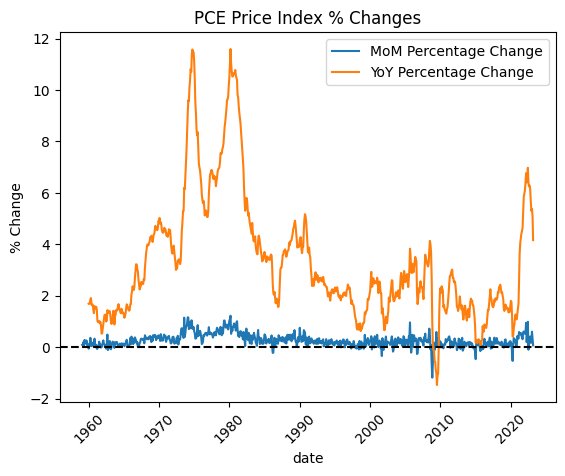

In [2]:
# Plot MoM_Percentage_Change and YoY_Percentage_Change
plt.plot(pcepi_data['date'], pcepi_data['MoM_Percentage_Change'], label='MoM Percentage Change')
plt.plot(pcepi_data['date'], pcepi_data['YoY_Percentage_Change'], label='YoY Percentage Change')

plt.xlabel('date')
plt.ylabel('% Change')
plt.title('PCE Price Index % Changes')
plt.legend()
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

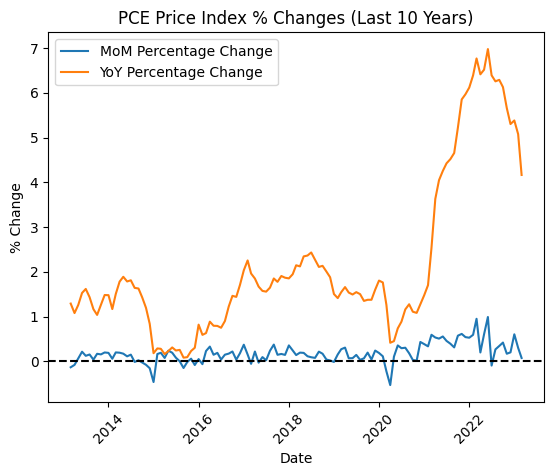

In [3]:
# Filter the DataFrame for the last 10 years
last_10_years_data = pcepi_data[pcepi_data['date'] >= pcepi_data['date'].max() - pd.DateOffset(years=10)]

# Plot MoM_Percentage_Change and YoY_Percentage_Change for the last 10 years
plt.plot(last_10_years_data['date'], last_10_years_data['MoM_Percentage_Change'], label='MoM Percentage Change')
plt.plot(last_10_years_data['date'], last_10_years_data['YoY_Percentage_Change'], label='YoY Percentage Change')

plt.xlabel('Date')
plt.ylabel('% Change')
plt.title('PCE Price Index % Changes (Last 10 Years)')
plt.legend()
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

In [4]:
# Convert DataFrame to JSON
pcepi_json = pcepi_data.to_json(orient='records')

# Parse the JSON
data = json.loads(pcepi_json)

# Get the last item
last_item = data[-1]

print("MoM % Change: " + str(last_item['MoM_Percentage_Change']) + "% | Last Updated: " + str(pcepi_info.last_updated))
print("YoY % Change: " + str(last_item['YoY_Percentage_Change']) + "% | Last Updated: " + str(pcepi_info.last_updated))

MoM % Change: 0.0760233455% | Last Updated: 2023-04-28 07:43:07-05
YoY % Change: 4.1641595437% | Last Updated: 2023-04-28 07:43:07-05


In [5]:
print("Info: " + str(pcepi_info.id))
print("Title: " + str(pcepi_info.title))
print("Frequency: " + str(pcepi_info.frequency))
print("Units: " + str(pcepi_info.units))
print("Last Updated: " + str(pcepi_info.last_updated))
print("Popularity: " + str(pcepi_info.popularity))
print("Notes: " + str(pcepi_info.notes))

Info: PCEPI
Title: Personal Consumption Expenditures: Chain-type Price Index
Frequency: Monthly
Units: Index 2012=100
Last Updated: 2023-04-28 07:43:07-05
Popularity: 79
Notes: BEA Account Code: DPCERG

The Personal Consumption Expenditures Price Index is a measure of the prices that people living in the United States, or those buying on their behalf, pay for goods and services. The change in the PCE price index is known for capturing inflation (or deflation) across a wide range of consumer expenses and reflecting changes in consumer behavior. For example, if the price of beef rises, shoppers may buy less beef and more chicken. 

The PCE Price Index is produced by the Bureau of Economic Analysis (BEA), which revises previously published PCE data to reflect updated information or new methodology, providing consistency across decades of data that's valuable for researchers. They also offer the series as a Chain-Type index, as above. The PCE price index is used primarily for macroeconomic